#### Decision Trees

#### Step1: Data Preprocessing

In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

#### Step 2: Encoding Categorical Variables

In [4]:
data_new = pd.get_dummies(data, columns=["Gender"])
data_new = data_new.drop(columns=["Gender_Female"])
data_new.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [5]:
X = data_new.iloc[:,[1,2,4]].values
Y = data_new.iloc[:,[3]].values

#### Step 3: Splitting the dataset

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42, test_size=0.25)


#### Step 4: Normalizing the data

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Step 5: Fitting the model

In [8]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42, splitter="best")
model.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

#### Step 6: Checking accuracy 

In [9]:
model.score(X_test,Y_test)

0.9

#### Step 7: Predicting the values

In [10]:
y_pred = model.predict(X_test)

#### Step 8: Plotting the decision tree

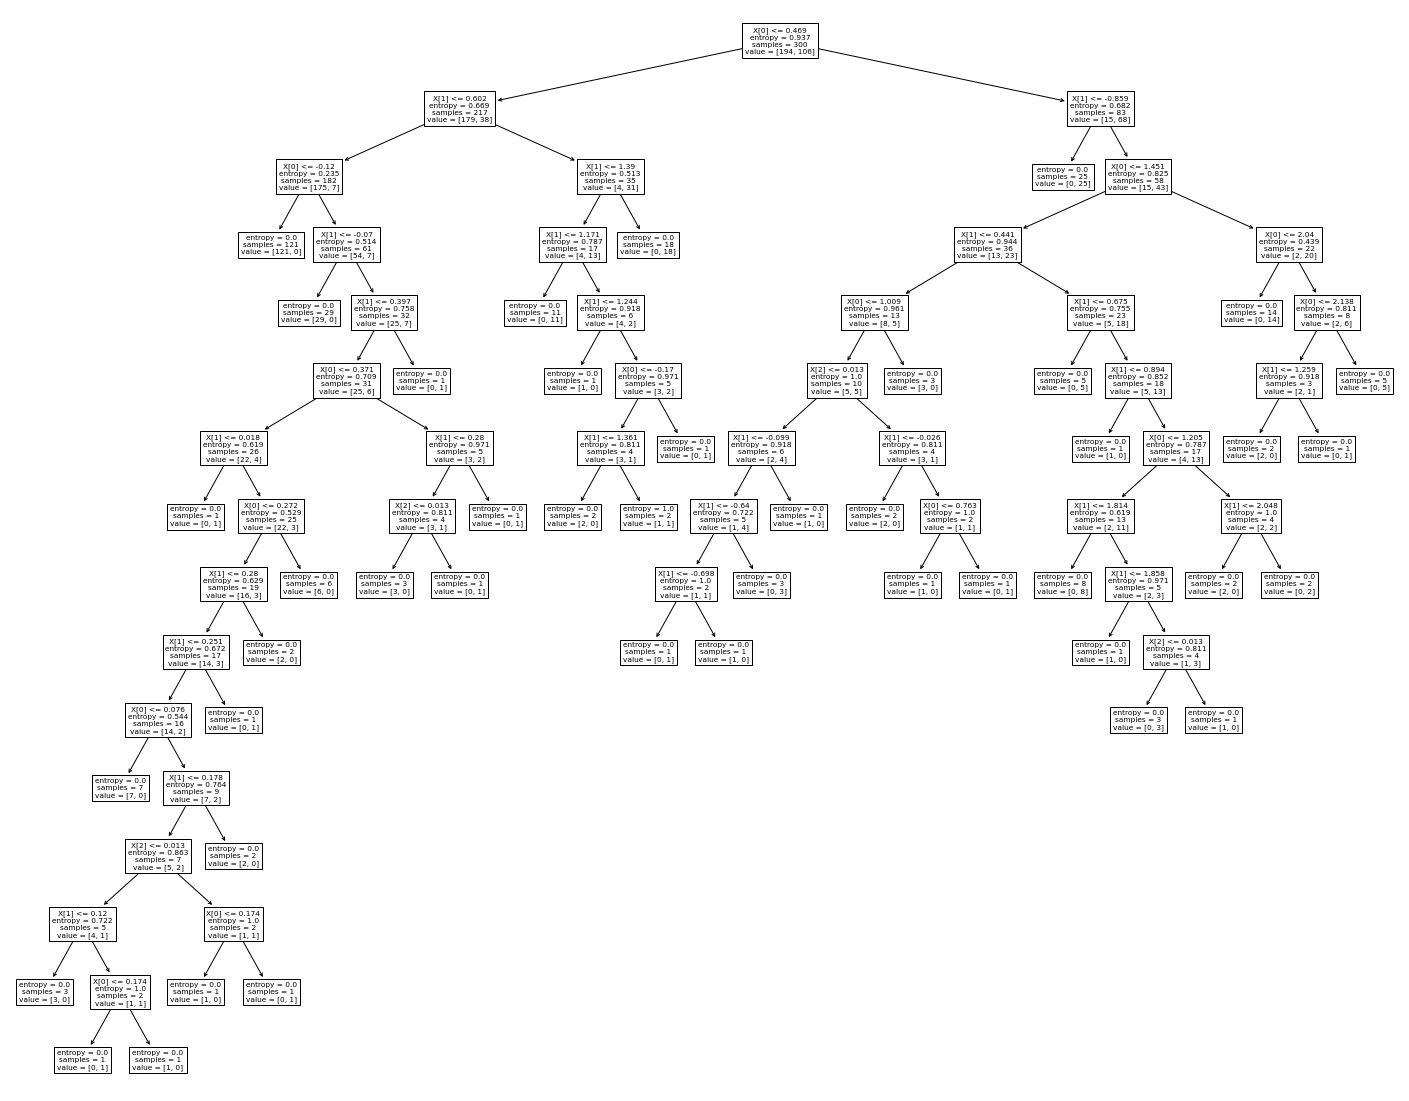

In [11]:
fig = plt.figure(figsize=(25,20))
fig = plot_tree(model)

#### Step 9: Checking accuracy using confusion matrix

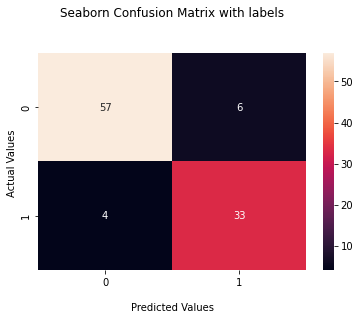

In [15]:
cm = confusion_matrix(Y_test,y_pred)
fig = sns.heatmap(cm,annot=True)
fig.set_title('Seaborn Confusion Matrix with labels\n\n')
fig.set_xlabel('\nPredicted Values')
fig.set_ylabel('Actual Values ')
plt.show()
